<a href="https://colab.research.google.com/github/majavk/EPRbiodose/blob/main/field_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import os
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/EPR/EPR_posao/EPR/08052017/FT_3 orijentacije_ N 20'
file_type = '.csv'

filenames = list()
for filename in os.listdir(path=path):
    if filename.endswith(file_type):
        filenames.append(filename)


In [ ]:
#one file in a folder is empty
MIN_ROW = 85
pd.read_csv(f'{path}/' + 'FT_No1_300_20052022_002.csv', header=None).iloc[MIN_ROW:, :]


,0


Storing the spectral data in the data frame. The files acquired from the measurements are having 1st 85 rows filled with measurement condtitions.

In [ ]:
df_final = pd.DataFrame()

MIN_ROW = 85
for i, item in enumerate(filenames):
    variable_filename = '_' + item
    variable_name_to_change = item
    variable_name_to_change = pd.read_csv(f'{path}/' + item, header=None).iloc[MIN_ROW:, :]
    field_variable_name_to_change = list()
    ampl_variable_name_to_change = list()

    for  row in variable_name_to_change.itertuples():
      field_variable_name_to_change.append(float(row[1].split(';')[0]))
      ampl_variable_name_to_change.append(float(row[1].split(';')[1]))
      
    row_field_variable ='new_field' + str(variable_filename)
    row_ampl_variable = 'new_ampl' + str(variable_filename)
    try:
      df_final[row_field_variable] = field_variable_name_to_change
      df_final[row_ampl_variable] = ampl_variable_name_to_change
    except ValueError:
      print(f'{i}th row is having a Value Error')

df_final.head()

7th row is having a Value Error


,new_field_FT_No10_180_10062022_result.csv,new_ampl_FT_No10_180_10062022_result.csv,new_field_FT_No1_60_20052022_result.csv,new_ampl_FT_No1_60_20052022_result.csv,new_field_FT_No10_60_10062022_result.csv,new_ampl_FT_No10_60_10062022_result.csv,new_field_FT_No11_180_10062022_result.csv,new_ampl_FT_No11_180_10062022_result.csv,new_field_FT_No10_300_10062022_result.csv,new_ampl_FT_No10_300_10062022_result.csv,...,new_field_FT_No8_180_19052022_result.csv,new_ampl_FT_No8_180_19052022_result.csv,new_field_FT_No9_60_19052022_result.csv,new_ampl_FT_No9_60_19052022_result.csv,new_field_FT_No9_180_19052022_result.csv,new_ampl_FT_No9_180_19052022_result.csv,new_field_FT_No8_300_19052022_result.csv,new_ampl_FT_No8_300_19052022_result.csv,new_field_FT_No8_60_19052022_result.csv,new_ampl_FT_No8_60_19052022_result.csv
0,326.000000,25.893702,326.000000,30.459298,326.000000,21.858613,326.000000,27.856200,326.000000,26.477697,...,326.000000,35.825387,326.000000,22.474807,326.000000,30.249027,326.000000,31.966345,326.000000,34.264772
1,326.000333,25.901341,326.000333,30.462603,326.000333,21.856854,326.000333,27.858653,326.000333,26.482638,...,326.000333,35.819369,326.000333,22.474819,326.000333,30.244624,326.000333,31.969268,326.000333,34.260534
2,326.000667,25.908980,326.000667,30.465907,326.000667,21.855095,326.000667,27.861106,326.000667,26.487579,...,326.000667,35.812618,326.000667,22.474830,326.000667,30.240221,326.000667,31.972190,326.000667,34.256297
3,326.001000,25.915817,326.001000,30.469211,326.001000,21.853337,326.001000,27.863559,326.001000,26.492519,...,326.001000,35.805866,326.001000,22.482296,326.001000,30.235843,326.001000,31.975112,326.001000,34.252060
4,326.001333,25.922493,326.001333,30.472516,326.001333,21.851613,326.001333,27.866011,326.001333,26.497575,...,326.001333,35.799114,326.001333,22.489816,326.001333,30.231733,326.001333,31.978034,326.001333,34.247823


The data of a spectra are separated in the first part where the standard, left, 3rd satelite of Mn2+ in MgO lies, for the field calibration data are and the second part where the data for the maximum of the EPR spectra of the sample response is.

In [ ]:
df_Mn_left = df_final[(df_final.iloc[:,0]> 330.) & (df_final.iloc[:, 0] < 333.)]
df_geff = df_final[(df_final.iloc[:,0]> 333.5) & (df_final.iloc[:, 0] < 338.)]

In [ ]:
print(df_Mn_left.shape)
print(df_geff.shape)

(9000, 118)
(13500, 118)


Separating field and amplitude spectral data for standard and sample signal.

In [ ]:
data = df_Mn_left.to_dict()
mn_left = pd.DataFrame()

for key, value in data.items():
    if 'ampl' in key:)
        B_MN_left_variable = 'B_Mn_left_'+key
        B_MN_left_column_variable = 'B_Mn_left_column_'+key
        values_Mn = 'values_Mn_'+ key
        values_Mn = list()
        for x,y in value.items():
            values_Mn.append(y)
        mn_left[B_MN_left_column_variable] = values_Mn
        
mn_left.head()

,B_Mn_left_column_new_ampl_FT_No10_180_10062022_result.csv,B_Mn_left_column_new_ampl_FT_No1_60_20052022_result.csv,B_Mn_left_column_new_ampl_FT_No10_60_10062022_result.csv,B_Mn_left_column_new_ampl_FT_No11_180_10062022_result.csv,B_Mn_left_column_new_ampl_FT_No10_300_10062022_result.csv,B_Mn_left_column_new_ampl_FT_No1_180_20052022_result.csv,B_Mn_left_column_new_ampl_FT_No11_300_10062022_result.csv,B_Mn_left_column_new_ampl_FT_No12_300_10062022_result.csv,B_Mn_left_column_new_ampl_FT_No12_60_10062022_result.csv,B_Mn_left_column_new_ampl_FT_No13_300_10062022_result.csv,...,B_Mn_left_column_new_ampl_FT_No5_300_20052022_result.csv,B_Mn_left_column_new_ampl_FT_No6_300_20052022_result.csv,B_Mn_left_column_new_ampl_FT_No7_300_19052022_result.csv,B_Mn_left_column_new_ampl_FT_No7_60_19052022_result.csv,B_Mn_left_column_new_ampl_FT_No9_300_19052022_result.csv,B_Mn_left_column_new_ampl_FT_No8_180_19052022_result.csv,B_Mn_left_column_new_ampl_FT_No9_60_19052022_result.csv,B_Mn_left_column_new_ampl_FT_No9_180_19052022_result.csv,B_Mn_left_column_new_ampl_FT_No8_300_19052022_result.csv,B_Mn_left_column_new_ampl_FT_No8_60_19052022_result.csv
0,-2.179855,-3.203578,-5.862995,-3.833249,-1.939709,-1.550532,-4.843958,-1.321955,-8.268413,-6.563918,...,-1.491152,-0.961118,-4.601973,-6.139305,1.016316,2.590200,-6.453105,-4.885062,-3.352084,1.576985
1,-2.173771,-3.195031,-5.864078,-3.838153,-1.938673,-1.547056,-4.842253,-1.315104,-8.266062,-6.565546,...,-1.483161,-0.964622,-4.601874,-6.143562,1.018493,2.584763,-6.446823,-4.883024,-3.350208,1.571826
2,-2.167686,-3.186189,-5.865162,-3.843085,-1.937636,-1.543579,-4.840548,-1.308253,-8.263710,-6.567175,...,-1.475156,-0.968706,-4.602230,-6.147820,1.020670,2.579332,-6.440539,-4.879631,-3.348333,1.566671
3,-2.161602,-3.177347,-5.866244,-3.848030,-1.936599,-1.540100,-4.838844,-1.301402,-8.261359,-6.568804,...,-1.466666,-0.972790,-4.602639,-6.152078,1.022847,2.572806,-6.434254,-4.876089,-3.346458,1.561517
4,-2.155515,-3.168505,-5.867327,-3.852976,-1.935562,-1.536624,-4.836977,-1.294552,-8.259008,-6.570433,...,-1.458177,-0.976873,-4.603048,-6.156337,1.025024,2.566073,-6.427970,-4.872547,-3.344584,1.556362


In [ ]:
data_1 = df_geff.to_dict()
df_geffective = pd.DataFrame()

for key, value in data_1.items():
    if 'ampl'in key:
        B_g_eff_variable = 'B_g_eff_'+key
        B_g_eff_column_variable = 'B_g_eff_column_'+key
        values = 'values_'+ key
        values = list()
        for x,y in value.items():
            values.append(y)
        df_geffective[B_g_eff_column_variable] = values
df_geffective.head()

,B_g_eff_column_new_ampl_FT_No10_180_10062022_result.csv,B_g_eff_column_new_ampl_FT_No1_60_20052022_result.csv,B_g_eff_column_new_ampl_FT_No10_60_10062022_result.csv,B_g_eff_column_new_ampl_FT_No11_180_10062022_result.csv,B_g_eff_column_new_ampl_FT_No10_300_10062022_result.csv,B_g_eff_column_new_ampl_FT_No1_180_20052022_result.csv,B_g_eff_column_new_ampl_FT_No11_300_10062022_result.csv,B_g_eff_column_new_ampl_FT_No12_300_10062022_result.csv,B_g_eff_column_new_ampl_FT_No12_60_10062022_result.csv,B_g_eff_column_new_ampl_FT_No13_300_10062022_result.csv,...,B_g_eff_column_new_ampl_FT_No5_300_20052022_result.csv,B_g_eff_column_new_ampl_FT_No6_300_20052022_result.csv,B_g_eff_column_new_ampl_FT_No7_300_19052022_result.csv,B_g_eff_column_new_ampl_FT_No7_60_19052022_result.csv,B_g_eff_column_new_ampl_FT_No9_300_19052022_result.csv,B_g_eff_column_new_ampl_FT_No8_180_19052022_result.csv,B_g_eff_column_new_ampl_FT_No9_60_19052022_result.csv,B_g_eff_column_new_ampl_FT_No9_180_19052022_result.csv,B_g_eff_column_new_ampl_FT_No8_300_19052022_result.csv,B_g_eff_column_new_ampl_FT_No8_60_19052022_result.csv
0,31.395774,29.281642,27.444855,30.948386,28.179696,30.897371,26.187235,29.414765,25.066687,26.276240,...,32.241039,26.185235,28.088501,24.665810,28.148197,28.147599,25.807787,27.360306,27.419904,31.319350
1,31.403345,29.301625,27.458808,30.952816,28.189512,30.900385,26.192132,29.428304,25.070243,26.280198,...,32.248453,26.184100,28.101236,24.675256,28.156527,28.148100,25.818632,27.354844,27.427088,31.323371
2,31.410916,29.321608,27.472754,30.957244,28.199339,30.903402,26.197028,29.441848,25.075180,26.284156,...,32.255806,26.183573,28.113729,24.684714,28.164849,28.148600,25.829476,27.349547,27.434275,31.327393
3,31.418488,29.341591,27.486709,30.961674,28.209157,30.906414,26.201925,29.455393,25.081700,26.288114,...,32.263159,26.183284,28.126226,24.694163,28.173171,28.149848,25.840328,27.344249,27.441459,31.331414
4,31.426058,29.361566,27.500658,30.966103,28.218976,30.909430,26.206822,29.468938,25.088221,26.292072,...,32.270512,26.182995,28.138722,24.703611,28.181493,28.151177,25.851170,27.338950,27.448645,31.335435


Evaluation of the g-values from the EPR spectral response (position of magnetic field where the absorption happened).

In [ ]:
def g_values(B_Mn_left, B_g_eff):
    g_Mn_left = 2.03339
    g_eff = g_Mn_left * (B_Mn_left/B_g_eff)
    return g_eff


Evaluation of magnetic field of maximum of EPR spectra for sample and the standard. 

In [ ]:
max_names = list()
max_values = list()
max_index = list()
for item in mn_left.columns.values.tolist():
    max_value = mn_left[item].sort_values(ascending=False)[:1]
    max_names.append(max_value.name)
    max_values.append(max_value.values[0])
    max_index.append(list(max_value.index)[0])
    
zipped_Mn = zip(max_names, max_values, max_index)
ampl_data_Mn = list(zipped_Mn)


In [ ]:
max_names_geff = list()
max_values_geff = list()
max_index_geff = list()

for item in df_geffective.columns.values.tolist():
    max_value = df_geffective[item].sort_values(ascending=False)[:1]
    max_names_geff.append(max_value.name)
    max_values_geff.append(max_value.values[0])
    max_index_geff.append(list(max_value.index)[0])
    
zipped_g_eff = zip(max_names_geff, max_values_geff, max_index_geff)
ampl_data_g_eff = list(zipped_g_eff)


In [ ]:
zipped_g_eff_Mn = zip(max_names, max_values, max_index, max_names_geff, max_values_geff, max_index_geff)
zipped_g_eff_Mn = list(zipped_g_eff_Mn)

Evaluation of the g_eff values and storing in the data frame.

In [ ]:
df = pd.DataFrame()

g_eff = list()
dose = list()
b_g_eff = list()
b_Mn_left = list()
for  name, value, index, name_geff, value_geff, index_geff in zipped_g_eff_Mn:
    replaced_name_geff = name_geff[15:].replace('ampl', 'field')
    replaced_name = name[17:].replace('ampl', 'field')
    B_g_eff = df_geff[replaced_name_geff].iloc[index_geff]
    B_Mn_left = df_Mn_left[replaced_name].iloc[index]
    variable_name = 'g_eff_' + replaced_name
    dose.append(variable_name)
    g_eff.append(g_values(B_Mn_left, B_g_eff))
    b_g_eff.append(B_g_eff)
    b_Mn_left.append(B_Mn_left)

df['g_eff'] = g_eff
df['meta_data'] = dose
df['B_g_eff'] = b_g_eff
df['B_Mn_left'] = b_Mn_left


Extracting the information on the dose, orientation and the sample from the column names.

In [ ]:
orientation = list()
sample = list()
for item in df['meta_data']:
  item = item.split('No')
  item = item[1][0:6]
  try:
    if item.endswith('_'):
      orientation.append(float(item[0:5].split('_')[1]))
      sample.append(float(item[0:5].split('_')[0]))
    else:
      orientation.append(float(item.split('_')[1]))
      sample.append(float(item.split('_')[0]))
  except IndexError:
    continue

df['No_sample'] = sample
df['orientation_sample'] = orientation
df_temp = df[['No_sample', 'orientation_sample', 'g_eff']]
df_temp = df_temp.sort_values('No_sample') 
df_temp

,No_sample,orientation_sample,g_eff
1,1.0,60.0,2.008728
5,1.0,180.0,2.008592
28,2.0,300.0,2.008850
31,2.0,180.0,2.008408
39,2.0,60.0,2.008144
36,3.0,60.0,2.009170
40,3.0,180.0,2.008744
41,3.0,300.0,2.008625
34,4.0,300.0,2.008566
42,4.0,180.0,2.008593


In [ ]:
df_temp = df_temp.groupby('No_sample').mean()


By using previously established calibration curve, the dose evaluation from the g_eff values was performed.

In [ ]:
def reverse_cal(g_eff, y_0, a, b):
  return -1/b * np.log((a-g_eff+y_0)/a) 

In [ ]:
df_temp['dose'] = df_temp['g_eff'].apply(lambda x: reverse_cal(x, 2.0082, 0.0032, 0.524))
df = df_temp[['g_eff', 'dose']]

,g_eff,dose
No_sample,,
1.0,2.008660,0.775403
2.0,2.008629,0.719494
3.0,2.008846,1.127883
4.0,2.008654,0.765469
5.0,2.008774,0.989199
6.0,2.008300,0.158549
7.0,2.008591,0.652099
8.0,2.008710,0.867853
9.0,2.008737,0.918240


In [ ]:
#x = df['dose']
#y = df['g_eff']
#x = df_plot['dose']
#y = df_plot['g_eff']
x_mean = df_plot['dose (Gy)']
y_mean = df_plot['g_eff']
def objective(x_mean, y_0, a, b):
  return y_0 + a * (1 - np.exp(-b*x_mean)) 


In [ ]:
g_eff_Co_10 = objective(10, 2.0082, 0.0030, 0.1612)

In [ ]:
g_eff_Co_7 = objective(7, 2.0082, 0.0030, 0.1612)

In [ ]:
d = [0, 0.1, 0.2, 0.5, 0.75, 1, 2, 5, 7, 10]

g_eff_Co = list()
for item in d:
  g_eff_Co.append(objective(item, 2.0082, 0.0030, 0.1612))
g_eff_Co

[2.0082,
 2.008247972304413,
 2.008295177494829,
 2.0084323120718803,
 2.0085416322977427,
 2.008646634510847,
 2.0090267748929342,
 2.0098600768136934,
 2.0102293484299927,
 2.0106015352849327]

In [ ]:
popt, pcov = curve_fit(objective, x_mean, y_mean, maxfev=1000)
y_0, a, b  = popt
popt

array([2.00833978, 0.00317865, 0.52409714])

In [ ]:
df_final['new_field_MKV_glass_bkg_27042022_result.csv'] = df_final['new_field_MKV_glass_bkg_27042022_result.csv'].apply(lambda x: x + 0.01)

In [ ]:
df_final['new_field_MKV_glass_0_1_60_09062022_result.csv']  = df_final['new_field_MKV_glass_0_1_60_09062022_result.csv'].apply(lambda x: x - 0.01)

In [ ]:
x_x_ray_01Gy_300 = df_final['new_field_MKV_glass_0_1_300_09062022_result.csv'] = x_x_ray_01Gy_300 = df_final['new_field_MKV_glass_0_1_300_09062022_result.csv'].apply(lambda x: x + 0.01)

In [ ]:
x_x_ray_01Gy_180 = df_final['new_field_MKV_glass_0_1_180_09062022_result.csv'] = x_x_ray_01Gy_180 = df_final['new_field_MKV_glass_0_1_180_09062022_result.csv'].apply(lambda x: x + 0.01)

In [ ]:
df_final.columns.values[:]

array(['new_field_FT_No10_180_10062022_result.csv',
       'new_ampl_FT_No10_180_10062022_result.csv',
       'new_field_FT_No1_60_20052022_result.csv',
       'new_ampl_FT_No1_60_20052022_result.csv',
       'new_field_FT_No10_60_10062022_result.csv',
       'new_ampl_FT_No10_60_10062022_result.csv',
       'new_field_FT_No11_180_10062022_result.csv',
       'new_ampl_FT_No11_180_10062022_result.csv',
       'new_field_FT_No10_300_10062022_result.csv',
       'new_ampl_FT_No10_300_10062022_result.csv',
       'new_field_FT_No1_180_20052022_result.csv',
       'new_ampl_FT_No1_180_20052022_result.csv',
       'new_field_FT_No11_300_10062022_result.csv',
       'new_ampl_FT_No11_300_10062022_result.csv',
       'new_field_FT_No12_300_10062022_result.csv',
       'new_ampl_FT_No12_300_10062022_result.csv',
       'new_field_FT_No12_60_10062022_result.csv',
       'new_ampl_FT_No12_60_10062022_result.csv',
       'new_field_FT_No13_300_10062022_result.csv',
       'new_ampl_FT_No13_300_10

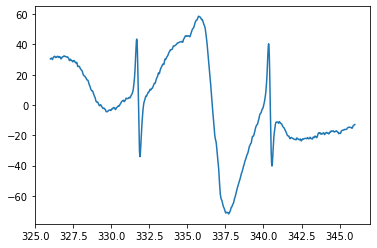

In [ ]:
x_bkg = df_final['new_field_FT_No1_60_20052022_result.csv']
y_bkg = df_final['new_ampl_FT_No1_60_20052022_result.csv']
plt.plot(x_bkg,y_bkg, label='BKG')

In [ ]:
df_final['new_field_FT_No3_60_20052022_result.csv'] = df_final['new_field_FT_No3_60_20052022_result.csv'].apply(lambda x: x - 0.5)

In [ ]:
df_final['new_field_FT_No3_180_20052022_result.csv'] = df_final['new_field_FT_No3_180_20052022_result.csv'].apply(lambda x: x + 0.2)

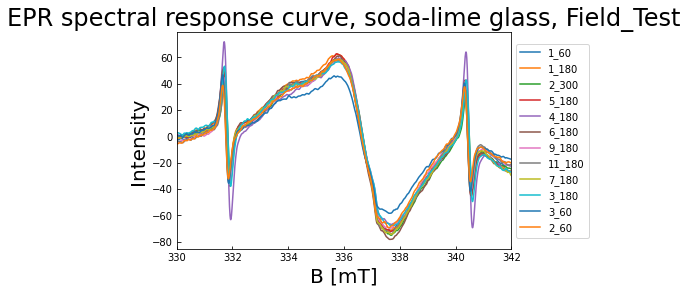

In [ ]:
x_1_180 = df_final['new_field_FT_No1_60_20052022_result.csv']
y_1_180 = df_final['new_ampl_FT_No1_60_20052022_result.csv']
plt.plot(x_1_180,y_1_180, label='1_60')

x_1_60 = df_final['new_field_FT_No1_180_20052022_result.csv']
y_1_60 = df_final['new_ampl_FT_No1_180_20052022_result.csv']
plt.plot(x_1_60,y_1_60, label='1_180')

x_10_300 = df_final['new_field_FT_No2_300_20052022_01_result.csv']
y_10_300 = df_final['new_ampl_FT_No2_300_20052022_01_result.csv']
plt.plot(x_10_300,y_10_300, label='2_300')



x_5_180 = df_final['new_field_FT_No5_180_20052022_result.csv']
y_5_180 = df_final['new_ampl_FT_No5_180_20052022_result.csv']
plt.plot(x_5_180,y_5_180, label='5_180')

x_4_180 = df_final['new_field_FT_No4_180_20052022_result.csv']
y_4_180 = df_final['new_ampl_FT_No4_180_20052022_result.csv']
plt.plot(x_4_180,y_4_180, label='4_180')

x_6_180 = df_final['new_field_FT_No6_180_20052022_result.csv']
y_6_180 = df_final['new_ampl_FT_No6_180_20052022_result.csv']
plt.plot(x_6_180,y_6_180, label='6_180')



x_9_180 = df_final['new_field_FT_No9_180_19052022_result.csv']
y_9_180 = df_final['new_ampl_FT_No9_180_19052022_result.csv']
plt.plot(x_9_180,y_9_180, label='9_180')

x_11_180 = df_final['new_field_FT_No11_180_10062022_result.csv']
y_11_180 = df_final['new_ampl_FT_No11_180_10062022_result.csv']
plt.plot(x_11_180,y_11_180, label='11_180')




x_7_180 = df_final['new_field_FT_No7_180_19052022_result.csv']
y_7_180 = df_final['new_ampl_FT_No7_180_19052022_result.csv']
plt.plot(x_7_180,y_7_180, label='7_180')


x_3_180 = df_final['new_field_FT_No3_180_20052022_result.csv']
y_3_180 = df_final['new_ampl_FT_No3_180_20052022_result.csv']
plt.plot(x_3_180,y_3_180, label='3_180')

x_3_60 = df_final['new_field_FT_No3_60_20052022_result.csv']
y_3_60 = df_final['new_ampl_FT_No3_60_20052022_result.csv']
plt.plot(x_3_60,y_3_60, label='3_60')

x_10_300 = df_final['new_field_FT_No2_60_20052022_result.csv']
y_10_300 = df_final['new_ampl_FT_No2_60_20052022_result.csv']
plt.plot(x_10_300,y_10_300, label='2_60')

plt.plot(figsize=(15,10))
plt.xlim(330, 342)
plt.title('EPR spectral response curve, soda-lime glass, Field_Test', fontsize=24)
#plt.xticks(np.arange(-1, 12, step=1))
plt.tick_params(axis="x",direction="in", left="off",labelleft="on")
#plt.yticks(np.arange(2.007, 2.012, step=1))
plt.tick_params(axis="y", direction="in", left="off",labelleft="on")
plt.xlabel('B [mT]', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()




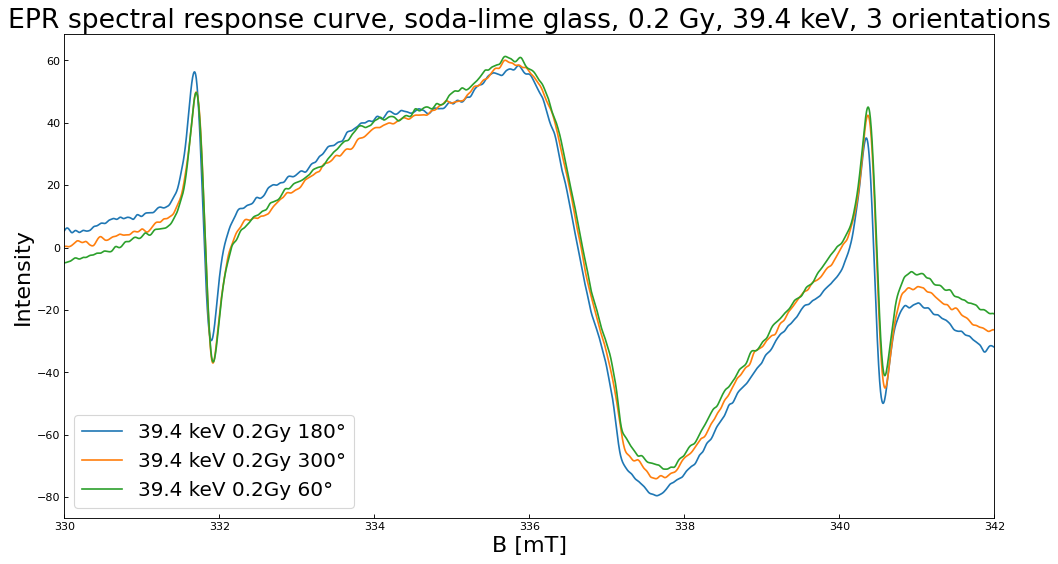

In [ ]:
x_bkg = df_final['new_field_MKV_glass_bkg_27042022_result.csv']
y_bkg = df_final['new_ampl_MKV_glass_bkg_27042022_result.csv']
# plt.plot(x_bkg,y_bkg, label='BKG')

x_x_ray_02Gy_180 = df_final['new_field_MKV_glass_0_2_180_09062022_result.csv'] 
y_x_ray_02Gy_180 = df_final['new_ampl_MKV_glass_0_2_180_09062022_result.csv']
plt.plot(x_x_ray_02Gy_180, y_x_ray_02Gy_180, label='39.4 keV 0.2Gy 180°')

x_x_ray_02Gy_300 = df_final['new_field_MKV_glass_0_2_300_09062022_result.csv'] 
y_x_ray_02Gy_300 = df_final['new_ampl_MKV_glass_0_2_300_09062022_result.csv']
plt.plot(x_x_ray_02Gy_300, y_x_ray_02Gy_300, label='39.4 keV 0.2Gy 300°')

x_x_ray_02Gy_60 = df_final['new_field_MKV_glass_0_2_60_09062022_result.csv'] 
y_x_ray_02Gy_60 = df_final['new_ampl_MKV_glass_0_2_60_09062022_result.csv']
plt.plot(x_x_ray_02Gy_60, y_x_ray_02Gy_60, label='39.4 keV 0.2Gy 60°')

plt.xlim(330, 342)
plt.title('EPR spectral response curve, soda-lime glass, 0.2 Gy, 39.4 keV, 3 orientations', fontsize=24)
#plt.xticks(np.arange(-1, 12, step=1))
plt.tick_params(axis="x",direction="in", left="off",labelleft="on")
#plt.yticks(np.arange(2.007, 2.012, step=1))
plt.tick_params(axis="y", direction="in", left="off",labelleft="on")
plt.xlabel('B [mT]', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.legend(loc=3, prop={'size': 18})
plt.show()


In [ ]:
df_final_Co['new_ampl_05K300.ASC'] = df_final_Co['new_ampl_05K300.ASC'].apply(lambda x: x/1.05)

In [ ]:
df_final_Co['new_field_05K300.ASC'] = df_final_Co['new_field_05K300.ASC'].apply(lambda x: x - 10)

In [ ]:
df_final['new_field_MKV_glass_0_5_60_05062022_result.csv'] = df_final['new_field_MKV_glass_0_5_60_05062022_result.csv'].apply(lambda x: x + 0.05)

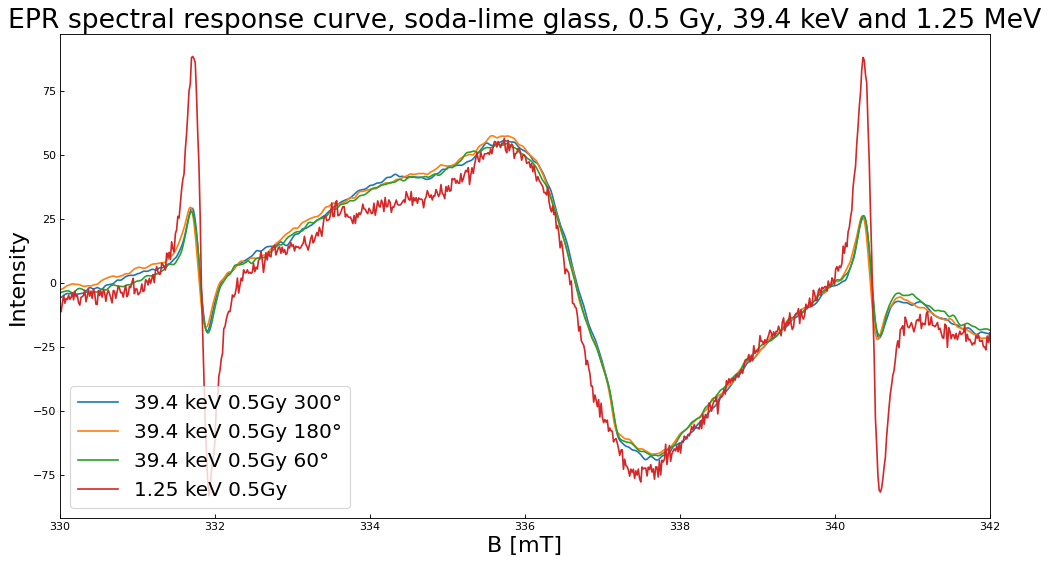

In [ ]:
x_bkg = df_final['new_field_MKV_glass_bkg_27042022_result.csv']
y_bkg = df_final['new_ampl_MKV_glass_bkg_27042022_result.csv']
#plt.plot(x_bkg,y_bkg, label='BKG')

x_x_ray_05Gy_300 = df_final['new_field_MKV_glass_0_5_300_05062022_result.csv'] 
y_x_ray_05Gy_300 = df_final['new_ampl_MKV_glass_0_5_300_05062022_result.csv']
plt.plot(x_x_ray_05Gy_300, y_x_ray_05Gy_300, label='39.4 keV 0.5Gy 300°')

x_x_ray_05Gy_180 = df_final['new_field_MKV_glass_0_5_180_05062022_result.csv'] 
y_x_ray_05Gy_180 = df_final['new_ampl_MKV_glass_0_5_180_05062022_result.csv']
plt.plot(x_x_ray_05Gy_180, y_x_ray_05Gy_180, label='39.4 keV 0.5Gy 180°')

x_x_ray_05Gy_60 = df_final['new_field_MKV_glass_0_5_60_05062022_result.csv'] 
y_x_ray_05Gy_60 = df_final['new_ampl_MKV_glass_0_5_60_05062022_result.csv']
plt.plot(x_x_ray_05Gy_60, y_x_ray_05Gy_60, label='39.4 keV 0.5Gy 60°')

x_x_ray_05Gy_60 = df_final_Co['new_field_05K300.ASC'] 
y_x_ray_05Gy_60 = df_final_Co['new_ampl_05K300.ASC']
plt.plot(x_x_ray_05Gy_60, y_x_ray_05Gy_60, label='1.25 keV 0.5Gy')

plt.xlim(330, 342)
plt.title('EPR spectral response curve, soda-lime glass, 0.5 Gy, 39.4 keV and 1.25 MeV', fontsize=24)
#plt.xticks(np.arange(-1, 12, step=1))
plt.tick_params(axis="x",direction="in", left="off",labelleft="on")
#plt.yticks(np.arange(2.007, 2.012, step=1))
plt.tick_params(axis="y", direction="in", left="off",labelleft="on")
plt.xlabel('B [mT]', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.legend(loc="lower left", prop={'size': 18})
plt.show()

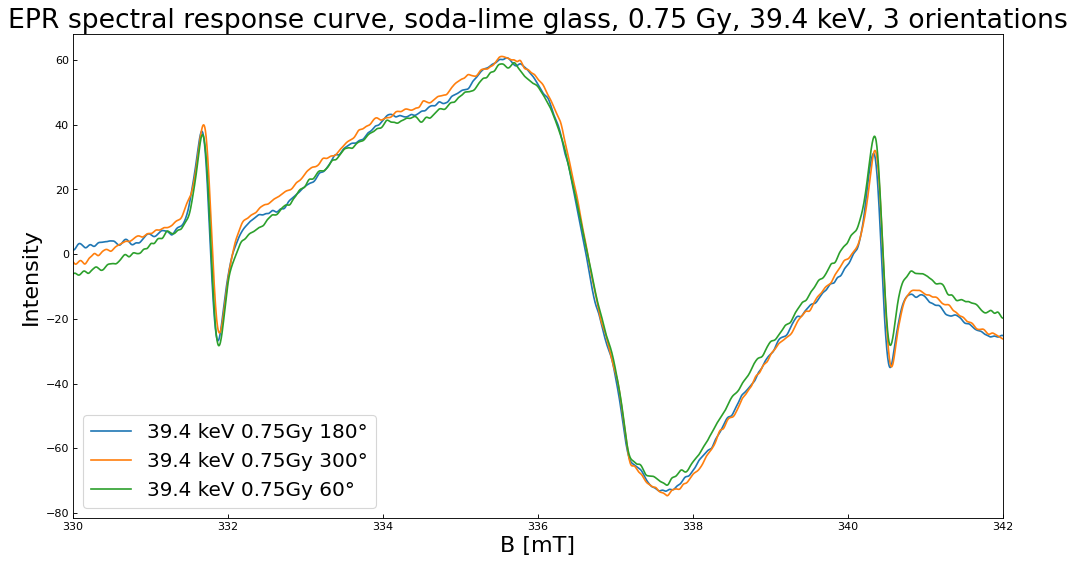

In [ ]:
x_bkg = df_final['new_field_MKV_glass_bkg_27042022_result.csv']
y_bkg = df_final['new_ampl_MKV_glass_bkg_27042022_result.csv']
# plt.plot(x_bkg,y_bkg, label='BKG')

x_x_ray_075Gy_180 = df_final['new_field_MKV_glass_0_75_180_09062022_result.csv'] 
y_x_ray_075Gy_180 = df_final['new_ampl_MKV_glass_0_75_180_09062022_result.csv']
plt.plot(x_x_ray_075Gy_180, y_x_ray_075Gy_180, label='39.4 keV 0.75Gy 180°')

x_x_ray_075Gy_300 = df_final['new_field_MKV_glass_0_75_300_09062022_result.csv'] 
y_x_ray_075Gy_300 = df_final['new_ampl_MKV_glass_0_75_300_09062022_result.csv']
plt.plot(x_x_ray_075Gy_300, y_x_ray_075Gy_300, label='39.4 keV 0.75Gy 300°')

x_x_ray_075Gy_60 = df_final['new_field_MKV_glass_0_75_60_09062022_result.csv'] 
y_x_ray_075Gy_60 = df_final['new_ampl_MKV_glass_0_75_60_09062022_result.csv']
plt.plot(x_x_ray_075Gy_60, y_x_ray_075Gy_60, label='39.4 keV 0.75Gy 60°')

plt.xlim(330, 342)
plt.title('EPR spectral response curve, soda-lime glass, 0.75 Gy, 39.4 keV, 3 orientations', fontsize=24)
#plt.xticks(np.arange(-1, 12, step=1))
plt.tick_params(axis="x",direction="in", left="off",labelleft="on")
#plt.yticks(np.arange(2.007, 2.012, step=1))
plt.tick_params(axis="y", direction="in", left="off",labelleft="on")
plt.xlabel('B [mT]', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.legend(loc=3, prop={'size': 18})
plt.show()

In [ ]:
df_final.columns

In [ ]:
df_final_Co['new_ampl_13B.ASC'] = df_final_Co['new_ampl_13B.ASC'].apply(lambda x: x + 10)

In [ ]:
df_final_Co['new_field_13B.ASC'] = df_final_Co['new_field_13B.ASC'].apply(lambda x: x + 0.02)

In [ ]:
df_final['new_field_MKV_glass_1_0060_05062022_result.csv'] = df_final['new_field_MKV_glass_1_0060_05062022_result.csv'].apply(lambda x: x - 0.02)

In [ ]:
df_final['new_field_MKV_glass_1_00180_05062022_result.csv'] = df_final['new_field_MKV_glass_1_00180_05062022_result.csv'].apply(lambda x: x + 0.01)

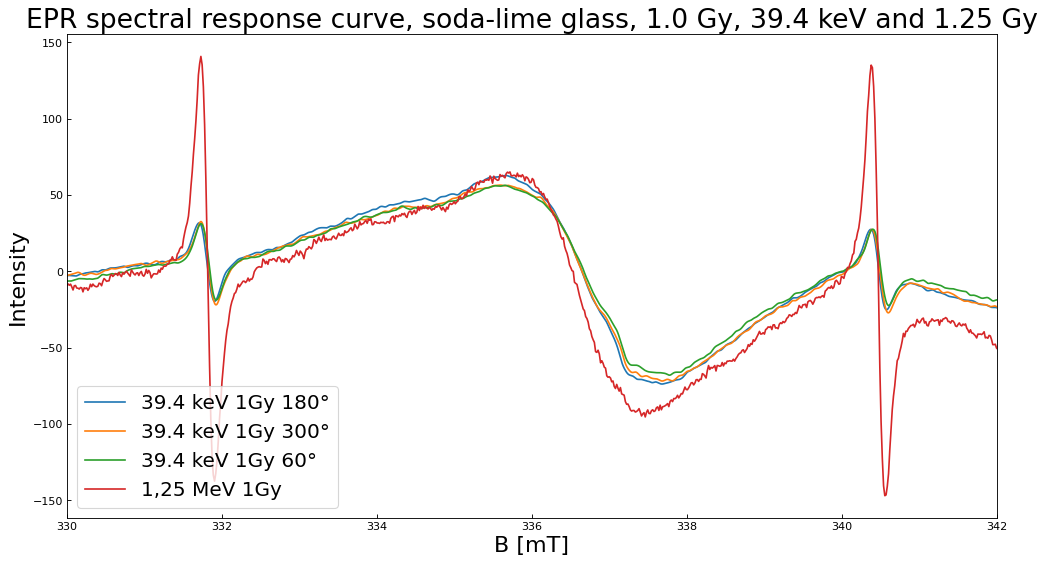

In [ ]:
x_bkg = df_final['new_field_MKV_glass_bkg_27042022_result.csv']
y_bkg = df_final['new_ampl_MKV_glass_bkg_27042022_result.csv']
#plt.plot(x_bkg,y_bkg, label='BKG')

x_x_ray_1Gy_180 = df_final['new_field_MKV_glass_1_00180_05062022_result.csv'] 
y_x_ray_1Gy_180 = df_final['new_ampl_MKV_glass_1_00180_05062022_result.csv']
plt.plot(x_x_ray_1Gy_180, y_x_ray_1Gy_180, label='39.4 keV 1Gy 180°')

x_x_ray_1Gy_300 = df_final['new_field_MKV_glass_1_00300_05062022_result.csv'] 
y_x_ray_1Gy_300 = df_final['new_ampl_MKV_glass_1_00300_05062022_result.csv']
plt.plot(x_x_ray_1Gy_300, y_x_ray_1Gy_300, label='39.4 keV 1Gy 300°')

x_x_ray_1Gy_60 = df_final['new_field_MKV_glass_1_0060_05062022_result.csv'] 
y_x_ray_1Gy_60 = df_final['new_ampl_MKV_glass_1_0060_05062022_result.csv']
plt.plot(x_x_ray_1Gy_60, y_x_ray_1Gy_60, label='39.4 keV 1Gy 60°')

x_x_ray_1Gy_60 = df_final_Co['new_field_13B.ASC'] 
y_x_ray_1Gy_60 = df_final_Co['new_ampl_13B.ASC']
plt.plot(x_x_ray_1Gy_60, y_x_ray_1Gy_60, label='1,25 MeV 1Gy')

# 'new_field_13B.ASC', 'new_ampl_13B.ASC', 'new_field_14B.ASC',
#        'new_ampl_14B.ASC', 'new_field_14C.ASC', 'new_ampl_14C.ASC',
#        'new_field_13A.ASC', 'new_ampl_13A.ASC', 'new_field_13C.ASC',
#        'new_ampl_13C.ASC', 'new_field_14A.ASC', 'new_ampl_14A.ASC',
plt.xlim(330, 342)
plt.title('EPR spectral response curve, soda-lime glass, 1.0 Gy, 39.4 keV and 1.25 Gy', fontsize=24)
#plt.xticks(np.arange(-1, 12, step=1))
plt.tick_params(axis="x",direction="in", left="off",labelleft="on")
#plt.yticks(np.arange(2.007, 2.012, step=1))
plt.tick_params(axis="y", direction="in", left="off",labelleft="on")
plt.xlabel('B [mT]', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.legend(loc=3, prop={'size': 18})
plt.show()

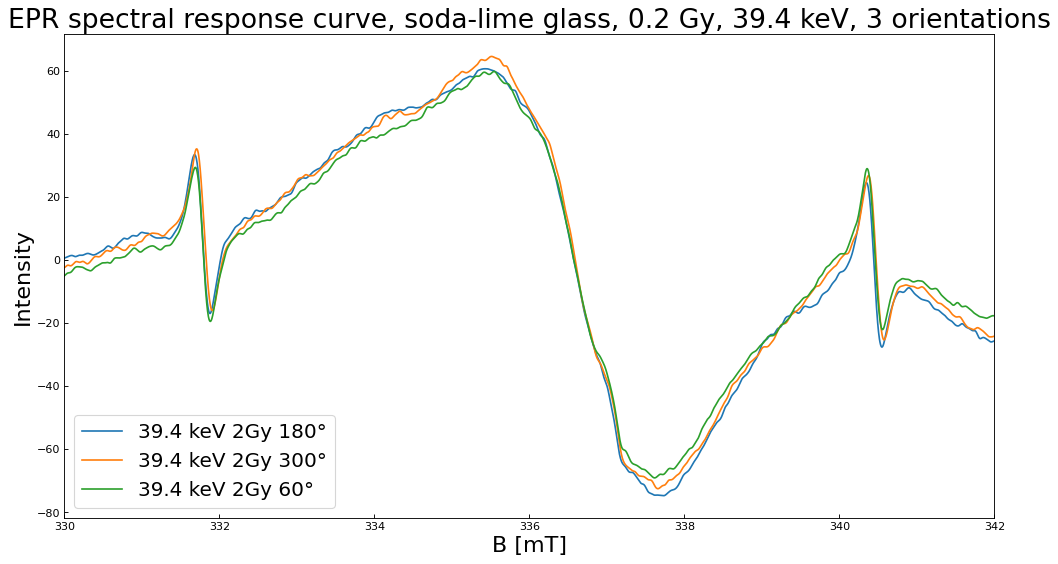

In [ ]:
x_bkg = df_final['new_field_MKV_glass_bkg_27042022_result.csv']
y_bkg = df_final['new_ampl_MKV_glass_bkg_27042022_result.csv']
# plt.plot(x_bkg,y_bkg, label='BKG')

x_x_ray_2Gy_180 = df_final['new_field_MKV_glass_2_00180_05062022_result.csv'] 
y_x_ray_2Gy_180 = df_final['new_ampl_MKV_glass_2_00180_05062022_result.csv']
plt.plot(x_x_ray_2Gy_180, y_x_ray_2Gy_180, label='39.4 keV 2Gy 180°')

x_x_ray_2Gy_300 = df_final['new_field_MKV_glass_2_00300_05062022_result.csv'] 
y_x_ray_2Gy_300 = df_final['new_ampl_MKV_glass_2_00300_05062022_result.csv']
plt.plot(x_x_ray_2Gy_300, y_x_ray_2Gy_300, label='39.4 keV 2Gy 300°')

x_x_ray_2Gy_60 = df_final['new_field_MKV_glass_2_0060_05062022_result.csv'] 
y_x_ray_2Gy_60 = df_final['new_ampl_MKV_glass_2_0060_05062022_result.csv']
plt.plot(x_x_ray_2Gy_60, y_x_ray_2Gy_60, label='39.4 keV 2Gy 60°')

plt.xlim(330, 342)
plt.title('EPR spectral response curve, soda-lime glass, 0.2 Gy, 39.4 keV, 3 orientations', fontsize=24)
#plt.xticks(np.arange(-1, 12, step=1))
plt.tick_params(axis="x",direction="in", left="off",labelleft="on")
#plt.yticks(np.arange(2.007, 2.012, step=1))
plt.tick_params(axis="y", direction="in", left="off",labelleft="on")
plt.xlabel('B [mT]', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.legend(loc=3, prop={'size': 18})
plt.show()

In [ ]:
df_final_Co.columns

In [ ]:
df_final_Co['new_ampl_855300.ASC'] = df_final_Co['new_ampl_855300.ASC'].apply(lambda x: x*1.1)

In [ ]:
df_final_Co['new_field_855300.ASC'] = df_final_Co['new_field_855300.ASC'].apply(lambda x: x + 0.15)

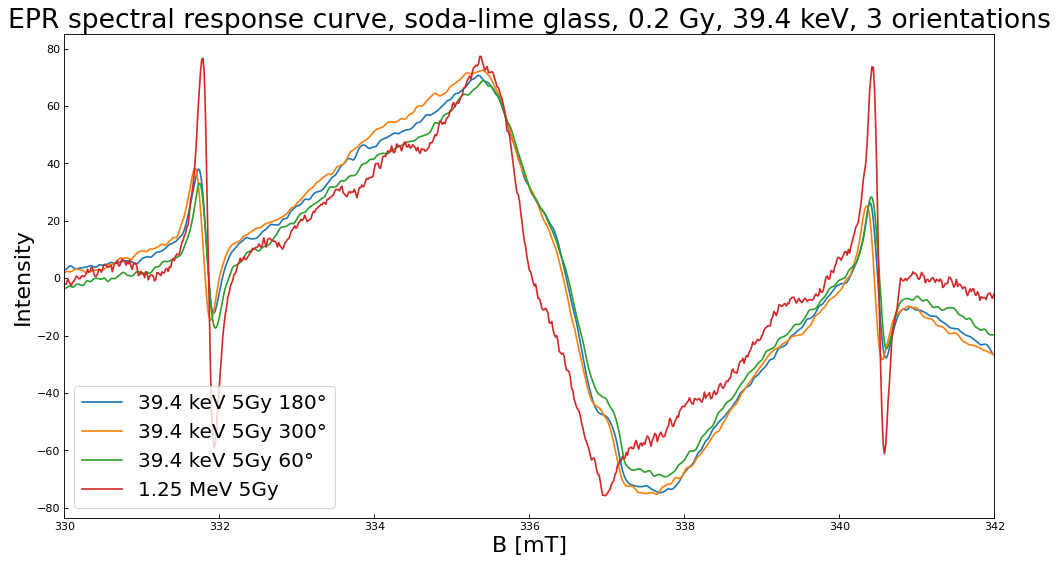

In [ ]:
x_bkg = df_final['new_field_MKV_glass_bkg_27042022_result.csv']
y_bkg = df_final['new_ampl_MKV_glass_bkg_27042022_result.csv']
#plt.plot(x_bkg,y_bkg, label='BKG')

x_x_ray_5Gy_180 = df_final['new_field_MKV_glass_5_00180_05062022_result.csv'] 
y_x_ray_5Gy_180 = df_final['new_ampl_MKV_glass_5_00180_05062022_result.csv']
plt.plot(x_x_ray_5Gy_180, y_x_ray_5Gy_180, label='39.4 keV 5Gy 180°')

x_x_ray_5Gy_300 = df_final['new_field_MKV_glass_5_00300_05062022_result.csv'] 
y_x_ray_5Gy_300 = df_final['new_ampl_MKV_glass_5_00300_05062022_result.csv']
plt.plot(x_x_ray_5Gy_300, y_x_ray_5Gy_300, label='39.4 keV 5Gy 300°')

x_x_ray_5Gy_60 = df_final['new_field_MKV_glass_5_0060_05062022_result.csv'] 
y_x_ray_5Gy_60 = df_final['new_ampl_MKV_glass_5_0060_05062022_result.csv']
plt.plot(x_x_ray_5Gy_60, y_x_ray_5Gy_60, label='39.4 keV 5Gy 60°')

x_x_ray_5Gy_60 = df_final_Co['new_field_855300.ASC'] 
y_x_ray_5Gy_60 = df_final_Co['new_ampl_855300.ASC']
plt.plot(x_x_ray_5Gy_60, y_x_ray_5Gy_60, label='1.25 MeV 5Gy')

plt.xlim(330, 342)
plt.title('EPR spectral response curve, soda-lime glass, 0.2 Gy, 39.4 keV, 3 orientations', fontsize=24)
#plt.xticks(np.arange(-1, 12, step=1))
plt.tick_params(axis="x",direction="in", left="off",labelleft="on")
#plt.yticks(np.arange(2.007, 2.012, step=1))
plt.tick_params(axis="y", direction="in", left="off",labelleft="on")
plt.xlabel('B [mT]', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.legend(loc=3, prop={'size': 18})
plt.show()


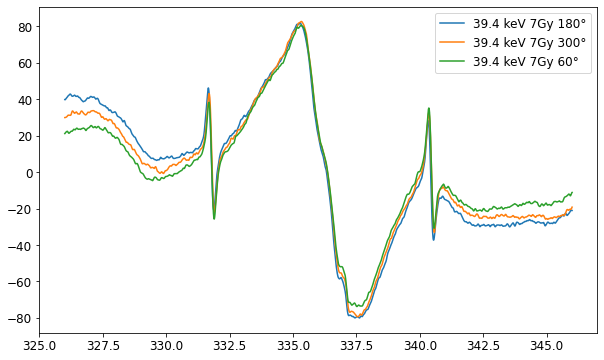

In [ ]:
x_bkg = df_final['new_field_MKV_glass_bkg_27042022_result.csv']
y_bkg = df_final['new_ampl_MKV_glass_bkg_27042022_result.csv']
# plt.plot(x_bkg,y_bkg, label='BKG')

x_x_ray_7Gy_180 = df_final['new_field_MKV_glass_7_180_09062022_result.csv'] 
y_x_ray_7Gy_180 = df_final['new_ampl_MKV_glass_7_180_09062022_result.csv']
plt.plot(x_x_ray_7Gy_180, y_x_ray_7Gy_180, label='39.4 keV 7Gy 180°')

x_x_ray_7Gy_300 = df_final['new_field_MKV_glass_7_300_09062022_result.csv'] 
y_x_ray_7Gy_300 = df_final['new_ampl_MKV_glass_7_300_09062022_result.csv']
plt.plot(x_x_ray_7Gy_300, y_x_ray_7Gy_300, label='39.4 keV 7Gy 300°')

x_x_ray_7Gy_60 = df_final[ 'new_field_MKV_glass_7_60_09062022_result.csv'] 
y_x_ray_7Gy_60 = df_final['new_ampl_MKV_glass_7_60_09062022_result.csv']
plt.plot(x_x_ray_7Gy_60, y_x_ray_7Gy_60, label='39.4 keV 7Gy 60°')

plt.xlim(330, 342)
plt.title('EPR spectral response curve, soda-lime glass, 0.2 Gy, 39.4 keV, 3 orientations', fontsize=24)
#plt.xticks(np.arange(-1, 12, step=1))
plt.tick_params(axis="x",direction="in", left="off",labelleft="on")
#plt.yticks(np.arange(2.007, 2.012, step=1))
plt.tick_params(axis="y", direction="in", left="off",labelleft="on")
plt.xlabel('B [mT]', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.legend(loc=3, prop={'size': 18})
plt.show()


In [ ]:
df_final_Co['new_ampl_8510000.ASC'] = df_final_Co['new_ampl_8510000.ASC'].apply(lambda x: x + 2)

In [ ]:
df_final_Co['new_field_8510000.ASC'] = df_final_Co['new_field_8510000.ASC'].apply(lambda x: x - 0.3)

In [ ]:
df_final['new_field_MKV_glass_bkg_27042022_result.csv'] = df_final['new_field_MKV_glass_bkg_27042022_result.csv'].apply(lambda x: x + 0.8)

In [ ]:
df_final['new_ampl_MKV_glass_bkg_27042022_result.csv'] = df_final['new_ampl_MKV_glass_bkg_27042022_result.csv'].apply(lambda x: x * 1.5)

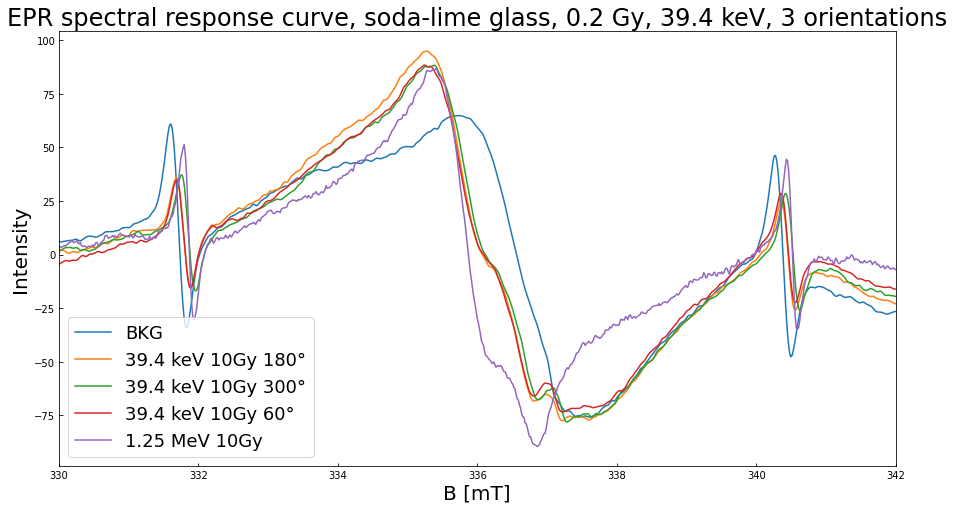

In [ ]:
plt.figure(figsize=(15,8))
x_bkg = df_final['new_field_MKV_glass_bkg_27042022_result.csv']
y_bkg = df_final['new_ampl_MKV_glass_bkg_27042022_result.csv']
plt.plot(x_bkg,y_bkg, label='BKG')

x_x_ray_10Gy_180 = df_final['new_field_MKV_glass_10_00180_05062022_result.csv'] 
y_x_ray_10Gy_180 = df_final[ 'new_ampl_MKV_glass_10_00180_05062022_result.csv']
plt.plot(x_x_ray_10Gy_180, y_x_ray_10Gy_180, label='39.4 keV 10Gy 180°')

x_x_ray_10Gy_300 = df_final['new_field_MKV_glass_10_0300_05062022_result.csv'] 
y_x_ray_10Gy_300 = df_final['new_ampl_MKV_glass_10_0300_05062022_result.csv']
plt.plot(x_x_ray_10Gy_300, y_x_ray_10Gy_300, label='39.4 keV 10Gy 300°')

x_x_ray_10Gy_60 = df_final['new_field_MKV_glass_10_060_05062022_result.csv'] 
y_x_ray_10Gy_60 = df_final[ 'new_ampl_MKV_glass_10_060_05062022_result.csv']
plt.plot(x_x_ray_10Gy_60, y_x_ray_10Gy_60, label='39.4 keV 10Gy 60°')

x_x_ray_10Gy_60 = df_final_Co['new_field_8510000.ASC'] 
y_x_ray_10Gy_60 = df_final_Co['new_ampl_8510000.ASC']
plt.plot(x_x_ray_10Gy_60, y_x_ray_10Gy_60, label='1.25 MeV 10Gy')

# 'new_field_8510120.ASC', 'new_ampl_8510120.ASC',
#        'new_field_8510180.ASC', 'new_ampl_8510180.ASC',
#        'new_field_8510000.ASC', 'new_ampl_8510000.ASC',
#        'new_field_8510060.ASC', 'new_ampl_8510060.ASC',
#        'new_field_8510300.ASC', 'new_ampl_8510300.ASC'

plt.xlim(330, 342)
plt.title('EPR spectral response curve, soda-lime glass, 0.2 Gy, 39.4 keV, 3 orientations', fontsize=24)
#plt.xticks(np.arange(-1, 12, step=1))
plt.tick_params(axis="x",direction="in", left="off",labelleft="on")
#plt.yticks(np.arange(2.007, 2.012, step=1))
plt.tick_params(axis="y", direction="in", left="off",labelleft="on")
plt.xlabel('B [mT]', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
plt.legend(loc=3, prop={'size': 18})
plt.show()


In [ ]:
df_final.columns.values

In [ ]:
df_final['new_field_MKV_glass_bkg_27042022_result.csv'] = df_final['new_field_MKV_glass_bkg_27042022_result.csv'].apply(lambda x: x + 0.1)

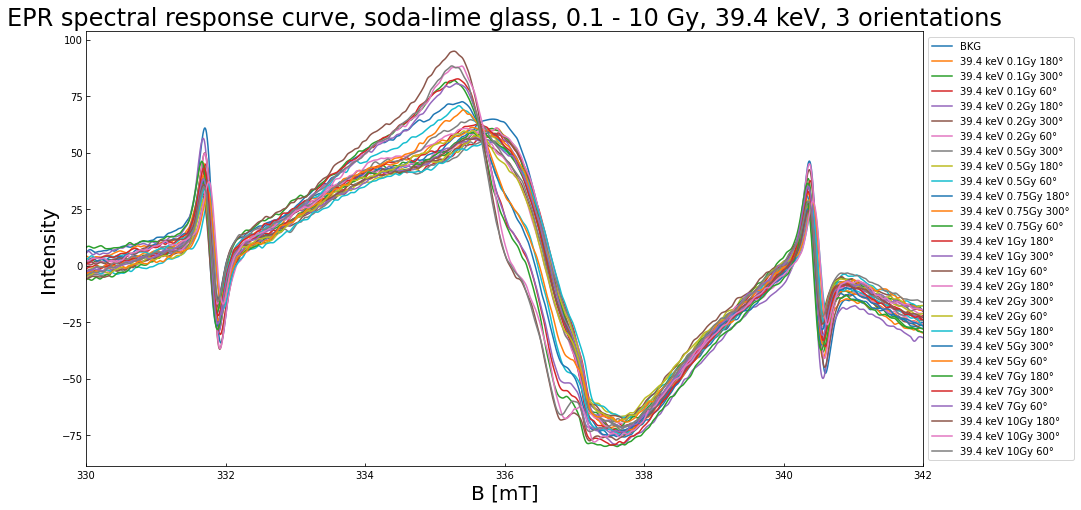

In [ ]:
plt.figure(figsize=(15,8))
x_bkg = df_final['new_field_MKV_glass_bkg_27042022_result.csv']
y_bkg = df_final['new_ampl_MKV_glass_bkg_27042022_result.csv']
plt.plot(x_bkg,y_bkg, label='BKG')

x_x_ray_01Gy_180 = df_final['new_field_MKV_glass_0_1_180_09062022_result.csv'] 
y_x_ray_01Gy_180 = df_final['new_ampl_MKV_glass_0_1_180_09062022_result.csv']
plt.plot(x_x_ray_01Gy_180, y_x_ray_01Gy_180, label='39.4 keV 0.1Gy 180°')

x_x_ray_01Gy_300 = df_final['new_field_MKV_glass_0_1_300_09062022_result.csv'] 
y_x_ray_01Gy_300 = df_final['new_ampl_MKV_glass_0_1_300_09062022_result.csv']
plt.plot(x_x_ray_01Gy_300, y_x_ray_01Gy_300, label='39.4 keV 0.1Gy 300°')

x_x_ray_01Gy_60 = df_final['new_field_MKV_glass_0_1_60_09062022_result.csv'] 
y_x_ray_01Gy_60 = df_final['new_ampl_MKV_glass_0_1_60_09062022_result.csv']
plt.plot(x_x_ray_01Gy_60, y_x_ray_01Gy_60, label='39.4 keV 0.1Gy 60°')

x_x_ray_02Gy_180 = df_final['new_field_MKV_glass_0_2_180_09062022_result.csv'] 
y_x_ray_02Gy_180 = df_final['new_ampl_MKV_glass_0_2_180_09062022_result.csv']
plt.plot(x_x_ray_02Gy_180, y_x_ray_02Gy_180, label='39.4 keV 0.2Gy 180°')


x_x_ray_02Gy_300 = df_final['new_field_MKV_glass_0_2_300_09062022_result.csv'] 
y_x_ray_02Gy_300 = df_final['new_ampl_MKV_glass_0_2_300_09062022_result.csv']
plt.plot(x_x_ray_02Gy_300, y_x_ray_02Gy_300, label='39.4 keV 0.2Gy 300°')

x_x_ray_02Gy_60 = df_final['new_field_MKV_glass_0_2_60_09062022_result.csv'] 
y_x_ray_02Gy_60 = df_final['new_ampl_MKV_glass_0_2_60_09062022_result.csv']
plt.plot(x_x_ray_02Gy_60, y_x_ray_02Gy_60, label='39.4 keV 0.2Gy 60°')

# 'new_field_MKV_glass_0_5_300_09062022_result.csv',
#        'new_ampl_MKV_glass_0_5_300_09062022_result.csv',
#        'new_field_MKV_glass_0_5_60_05062022_result.csv',
#        'new_ampl_MKV_glass_0_5_60_05062022_result.csv',
#        'new_field_MKV_glass_0_5_180_05062022_result.csv',
#        'new_ampl_MKV_glass_0_5_180_05062022_result.csv',
#        'new_field_MKV_glass_0_5_300_05062022_result.csv',
#        'new_ampl_MKV_glass_0_5_300_05062022_result.csv'

x_x_ray_05Gy_300 = df_final['new_field_MKV_glass_0_5_300_05062022_result.csv'] 
y_x_ray_05Gy_300 = df_final['new_ampl_MKV_glass_0_5_300_05062022_result.csv']
plt.plot(x_x_ray_05Gy_300, y_x_ray_05Gy_300, label='39.4 keV 0.5Gy 300°')

x_x_ray_05Gy_180 = df_final['new_field_MKV_glass_0_5_180_05062022_result.csv'] 
y_x_ray_05Gy_180 = df_final['new_ampl_MKV_glass_0_5_180_05062022_result.csv']
plt.plot(x_x_ray_05Gy_180, y_x_ray_05Gy_180, label='39.4 keV 0.5Gy 180°')

x_x_ray_05Gy_60 = df_final['new_field_MKV_glass_0_5_60_05062022_result.csv'] 
y_x_ray_05Gy_60 = df_final['new_ampl_MKV_glass_0_5_60_05062022_result.csv']
plt.plot(x_x_ray_05Gy_60, y_x_ray_05Gy_60, label='39.4 keV 0.5Gy 60°')

x_x_ray_075Gy_180 = df_final['new_field_MKV_glass_0_75_180_09062022_result.csv'] 
y_x_ray_075Gy_180 = df_final['new_ampl_MKV_glass_0_75_180_09062022_result.csv']
plt.plot(x_x_ray_075Gy_180, y_x_ray_075Gy_180, label='39.4 keV 0.75Gy 180°')

x_x_ray_075Gy_300 = df_final['new_field_MKV_glass_0_75_300_09062022_result.csv'] 
y_x_ray_075Gy_300 = df_final['new_ampl_MKV_glass_0_75_300_09062022_result.csv']
plt.plot(x_x_ray_075Gy_300, y_x_ray_075Gy_300, label='39.4 keV 0.75Gy 300°')

x_x_ray_075Gy_60 = df_final['new_field_MKV_glass_0_75_60_09062022_result.csv'] 
y_x_ray_075Gy_60 = df_final['new_ampl_MKV_glass_0_75_60_09062022_result.csv']
plt.plot(x_x_ray_075Gy_60, y_x_ray_075Gy_60, label='39.4 keV 0.75Gy 60°')

x_x_ray_1Gy_180 = df_final['new_field_MKV_glass_1_00180_05062022_result.csv'] 
y_x_ray_1Gy_180 = df_final['new_ampl_MKV_glass_1_00180_05062022_result.csv']
plt.plot(x_x_ray_1Gy_180, y_x_ray_1Gy_180, label='39.4 keV 1Gy 180°')

x_x_ray_1Gy_300 = df_final['new_field_MKV_glass_1_00300_05062022_result.csv'] 
y_x_ray_1Gy_300 = df_final['new_ampl_MKV_glass_1_00300_05062022_result.csv']
plt.plot(x_x_ray_1Gy_300, y_x_ray_1Gy_300, label='39.4 keV 1Gy 300°')

x_x_ray_1Gy_60 = df_final['new_field_MKV_glass_1_0060_05062022_result.csv'] 
y_x_ray_1Gy_60 = df_final['new_ampl_MKV_glass_1_0060_05062022_result.csv']
plt.plot(x_x_ray_1Gy_60, y_x_ray_1Gy_60, label='39.4 keV 1Gy 60°')

x_x_ray_2Gy_180 = df_final['new_field_MKV_glass_2_00180_05062022_result.csv'] 
y_x_ray_2Gy_180 = df_final['new_ampl_MKV_glass_2_00180_05062022_result.csv']
plt.plot(x_x_ray_2Gy_180, y_x_ray_2Gy_180, label='39.4 keV 2Gy 180°')

x_x_ray_2Gy_300 = df_final['new_field_MKV_glass_2_00300_05062022_result.csv'] 
y_x_ray_2Gy_300 = df_final['new_ampl_MKV_glass_2_00300_05062022_result.csv']
plt.plot(x_x_ray_2Gy_300, y_x_ray_2Gy_300, label='39.4 keV 2Gy 300°')

x_x_ray_2Gy_60 = df_final['new_field_MKV_glass_2_0060_05062022_result.csv'] 
y_x_ray_2Gy_60 = df_final['new_ampl_MKV_glass_2_0060_05062022_result.csv']
plt.plot(x_x_ray_2Gy_60, y_x_ray_2Gy_60, label='39.4 keV 2Gy 60°')

x_x_ray_5Gy_180 = df_final['new_field_MKV_glass_5_00180_05062022_result.csv'] 
y_x_ray_5Gy_180 = df_final['new_ampl_MKV_glass_5_00180_05062022_result.csv']
plt.plot(x_x_ray_5Gy_180, y_x_ray_5Gy_180, label='39.4 keV 5Gy 180°')

x_x_ray_5Gy_300 = df_final['new_field_MKV_glass_5_00300_05062022_result.csv'] 
y_x_ray_5Gy_300 = df_final['new_ampl_MKV_glass_5_00300_05062022_result.csv']
plt.plot(x_x_ray_5Gy_300, y_x_ray_5Gy_300, label='39.4 keV 5Gy 300°')

x_x_ray_5Gy_60 = df_final['new_field_MKV_glass_5_0060_05062022_result.csv'] 
y_x_ray_5Gy_60 = df_final['new_ampl_MKV_glass_5_0060_05062022_result.csv']
plt.plot(x_x_ray_5Gy_60, y_x_ray_5Gy_60, label='39.4 keV 5Gy 60°')

x_x_ray_7Gy_180 = df_final['new_field_MKV_glass_7_00180_09062022_result.csv'] 
y_x_ray_7Gy_180 = df_final['new_ampl_MKV_glass_7_00180_09062022_result.csv']
plt.plot(x_x_ray_7Gy_180, y_x_ray_7Gy_180, label='39.4 keV 7Gy 180°')

x_x_ray_7Gy_300 = df_final['new_field_MKV_glass_7_00300_09062022_result.csv'] 
y_x_ray_7Gy_300 = df_final['new_ampl_MKV_glass_7_00300_09062022_result.csv']
plt.plot(x_x_ray_7Gy_300, y_x_ray_7Gy_300, label='39.4 keV 7Gy 300°')

x_x_ray_7Gy_60 = df_final[ 'new_field_MKV_glass_7_0060_09062022_result.csv'] 
y_x_ray_7Gy_60 = df_final['new_ampl_MKV_glass_7_0060_09062022_result.csv']
plt.plot(x_x_ray_7Gy_60, y_x_ray_7Gy_60, label='39.4 keV 7Gy 60°')

x_x_ray_10Gy_180 = df_final['new_field_MKV_glass_10_00180_05062022_result.csv'] 
y_x_ray_10Gy_180 = df_final[ 'new_ampl_MKV_glass_10_00180_05062022_result.csv']
plt.plot(x_x_ray_10Gy_180, y_x_ray_10Gy_180, label='39.4 keV 10Gy 180°')

x_x_ray_10Gy_300 = df_final['new_field_MKV_glass_10_0300_05062022_result.csv'] 
y_x_ray_10Gy_300 = df_final['new_ampl_MKV_glass_10_0300_05062022_result.csv']
plt.plot(x_x_ray_10Gy_300, y_x_ray_10Gy_300, label='39.4 keV 10Gy 300°')

x_x_ray_10Gy_60 = df_final['new_field_MKV_glass_10_060_05062022_result.csv'] 
y_x_ray_10Gy_60 = df_final[ 'new_ampl_MKV_glass_10_060_05062022_result.csv']
plt.plot(x_x_ray_10Gy_60, y_x_ray_10Gy_60, label='39.4 keV 10Gy 60°')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(330, 342)
plt.title('EPR spectral response curve, soda-lime glass, 0.1 - 10 Gy, 39.4 keV, 3 orientations', fontsize=24)
#plt.xticks(np.arange(-1, 12, step=1))
plt.tick_params(axis="x",direction="in", left="off",labelleft="on")
#plt.yticks(np.arange(2.007, 2.012, step=1)
plt.tick_params(axis="y", direction="in", left="off",labelleft="on")
plt.xlabel('B [mT]', fontsize=20)
plt.ylabel('Intensity', fontsize=20)
#plt.legend(loc=3, prop={'size': 18})
plt.show()


In [ ]:
for i in range(10):
    variableNameToChange="df_" + str(i)
    print(variableNameToChange)

df_0
df_1
df_2
df_3
df_4
df_5
df_6
df_7
df_8
df_9
